In [1]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns
import numpy as np

In [2]:
# Change this to name of the current spreadsheet you are working with by copying relative path
csv_file = "ProcessedData\CLEANED_SIGNAGE_UPDATED Commuter Shuttle Evaluation Data Export 2024-08-07.csv"
df = pd.read_csv(csv_file)

In [3]:
# Print the total number of entries (rows) in the DataFrame
total_entries = df.shape[0]
print(f"Total number of entries: {total_entries}")

Total number of entries: 80


In [4]:
# Displays head of the table
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))

+---+-----------------+----+-----------------+----------------------------+------------------+------------------+-------------------+------------------------------------------------------------+------------------------+----------------------+-----------------+---------------------+----------------------------+------------------------+------------------------+-----------------------+-----------------+-----------------------+---------------------------+---------------------+-----------------+--------------------------------------------------------------+-----------------+------------------------------------+--------------------------+----------------------+-----------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [5]:
print("Number of unique responses for signage updated:", df['Signage_Updated'].nunique())
print("Unique responses:", df['Signage_Updated'].unique())

Number of unique responses for signage updated: 3
Unique responses: [nan 'Yes' 'Maybe' 'No']


In [6]:
def transform_nas_to_maybes(df, column_name):
    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        raise KeyError(f"The column '{column_name}' does not exist in the DataFrame")
    
    # Replace NaN values with 'Maybe'
    df[column_name] = df[column_name].fillna('Maybe')
    
    return df

In [7]:
df = transform_nas_to_maybes(df, 'Signage_Present')
df = transform_nas_to_maybes(df, 'Signage_Updated')

In [8]:
def make_summary_table(field_name, df):
# Count the occurrences of each unique value in 'Signage_Updated'
    signage_counts = df[field_name].value_counts()

    # Calculate the percentage of each unique value
    total_entries = df.shape[0]
    signage_percentages = (signage_counts / total_entries) * 100

    # Convert the counts and percentages to a DataFrame for better formatting
    signage_counts_df = pd.DataFrame({
        field_name: signage_counts.index,
        'Count': signage_counts.values,
        'Percentage': signage_percentages.values
    })

    # Print the tabulated counts with percentages
    print(f"Number of unique responses for {field_name}:")
    print(tabulate(signage_counts_df, headers='keys', tablefmt='pretty', floatfmt=".2f"))

    print(type(signage_counts_df))
    return signage_counts_df


In [9]:
signage_updated_df = make_summary_table("Signage_Updated", df)
signage_present_df = make_summary_table("Signage_Present", df)

Number of unique responses for Signage_Updated:
+---+-----------------+-------+------------+
|   | Signage_Updated | Count | Percentage |
+---+-----------------+-------+------------+
| 0 |       Yes       |  40   |    50.0    |
| 1 |      Maybe      |  35   |   43.75    |
| 2 |       No        |   5   |    6.25    |
+---+-----------------+-------+------------+
<class 'pandas.core.frame.DataFrame'>
Number of unique responses for Signage_Present:
+---+-----------------+-------+------------+
|   | Signage_Present | Count | Percentage |
+---+-----------------+-------+------------+
| 0 |       Yes       |  45   |   56.25    |
| 1 |       No        |  28   |    35.0    |
| 2 |      Maybe      |   7   |    8.75    |
+---+-----------------+-------+------------+
<class 'pandas.core.frame.DataFrame'>


In [10]:
make_summary_table("Signage_Present", df)

Number of unique responses for Signage_Present:
+---+-----------------+-------+------------+
|   | Signage_Present | Count | Percentage |
+---+-----------------+-------+------------+
| 0 |       Yes       |  45   |   56.25    |
| 1 |       No        |  28   |    35.0    |
| 2 |      Maybe      |   7   |    8.75    |
+---+-----------------+-------+------------+
<class 'pandas.core.frame.DataFrame'>


,Signage_Present,Count,Percentage
0,Yes,45,56.25
1,No,28,35.00
2,Maybe,7,8.75


In [11]:
def make_pie_chart(df, field_name, colors):
# Pie chart
    fig, ax = plt.subplots(figsize=(8, 6))  # Set figure size

    # Create pie chart
    ax.pie(df['Count'], labels=df[field_name], autopct='%1.1f%%', colors=colors)

    # Add title
    ax.set_title(f'{field_name} Status')

    ax.set_title(f'{field_name} Status', fontsize=16)  # Adjust the fontsize as needed

    # Save the pie chart as an image file
    plt.savefig(f'{field_name}_pie_chart.png', bbox_inches='tight', pad_inches=0.1)

    # Show the pie chart
    plt.show()

In [12]:
type(signage_updated_df)

pandas.core.frame.DataFrame

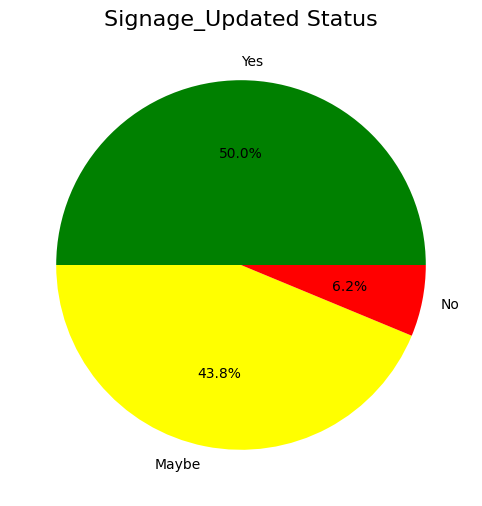

In [13]:
make_pie_chart(signage_updated_df, "Signage_Updated", ['green', 'yellow', 'red'])

In [14]:
print(signage_present_df.columns)

Index(['Signage_Present', 'Count', 'Percentage'], dtype='object')


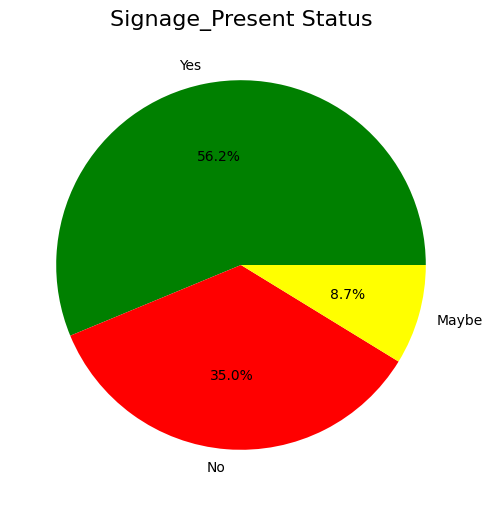

In [15]:
make_pie_chart(signage_present_df, 'Signage_Present', ['green', 'red', 'yellow'])

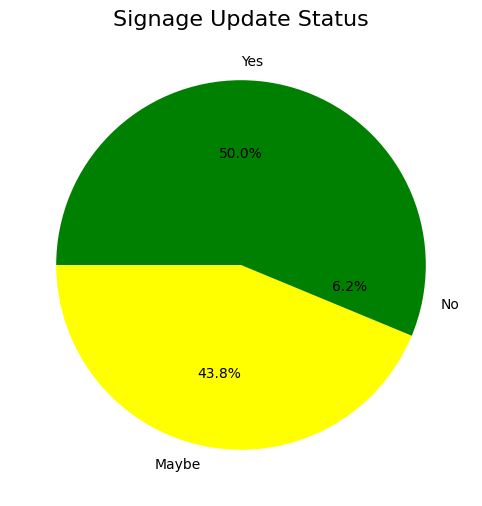

In [16]:
# Pie chart
fig, ax = plt.subplots(figsize=(8, 6))  # Set figure size

# Create pie chart
ax.pie(signage_updated_df['Count'], labels=signage_updated_df['Signage_Updated'], autopct='%1.1f%%', colors=['green', 'yellow'])

# Add title
ax.set_title('Signage Update Status')

ax.set_title('Signage Update Status', fontsize=16)  # Adjust the fontsize as needed

# Save the pie chart as an image file
plt.savefig('signage_update_pie_chart.png', bbox_inches='tight', pad_inches=0.1)

# Show the pie chart
plt.show()

In [17]:
# Print all column names
print("Column names in the DataFrame:")
print(df.columns.tolist())

Column names in the DataFrame:
['Shuttle_Stop_ID', 'ID', 'Start_Time', 'Email_Address', 'Name', 'Evaluator_Name', 'Shuttle_Stop_ID.1', 'Shuttle_Stop_Location', 'Shuttle_Stop_Type', 'Listed_Hours', 'Evaluation_Type', 'Streetview_Snapshot', 'In_Person_Observation_Date', 'Observation_Start_Time', 'Active_Use_Observation', 'Shuttle_Parking_Space', 'No_Space_Reason', 'Zone_Extension_Issues', 'Shuttle_Lack_Obstructions', 'Obstruction_Details', 'Signage_Present', 'Does posted signage include\xa0hours for commuter shuttle use?\xa0', 'Signage_Updated', 'Signage_Update_Needed', 'Curb_Paint_Match_Signage', 'Curb_Paint_Condition', 'Curb_Paint_Quality_Issues', 'Photos', 'Other_Site_Notes', 'Old_ID', 'Last_Modified_Time']


In [28]:
# Combine rows for 'Dedicated Shuttle Stop' and 'Dedicated Shuttle Stop\r\n'
df['Shuttle_Stop_Type'] = df['Shuttle_Stop_Type'].replace({
    'Dedicated Shuttle Stop\r\n': 'Dedicated Shuttle Stop'
})
print(df['Shuttle_Stop_Type'].unique())

['Muni Shared Stop' 'Dedicated Shuttle Stop' nan 'Peak Extension Zone'
 'Commercial/Passenger Loading']


In [35]:
cross_tab_counts = pd.crosstab(index=df['Shuttle_Stop_Type'], columns=df['Signage_Present'])

# Create the cross-tabulation table with percentages
cross_tab_percentage = pd.crosstab(index=df['Shuttle_Stop_Type'], columns=df['Signage_Present'], normalize='index') * 100

# Truncate decimal numbers in percentages & format properly
cross_tab_percentage = np.floor(cross_tab_percentage)
cross_tab_percentage = cross_tab_percentage.astype(int).astype(str) + '%'

# Combine counts and percentages into a single DataFrame
combined_df = pd.concat([cross_tab_counts, cross_tab_percentage], keys=['Counts', 'Percentages'], axis=1)

# Print the combined DataFrame
print("Cross-tabulation with counts and percentages:")
print(combined_df)

Cross-tabulation with counts and percentages:
                             Counts         Percentages           
Signage_Present               Maybe  No Yes       Maybe   No   Yes
Shuttle_Stop_Type                                                 
Commercial/Passenger Loading      1   0   0        100%   0%    0%
Dedicated Shuttle Stop            2   2  27          6%   6%   87%
Muni Shared Stop                  4  24  11         10%  61%   28%
Peak Extension Zone               0   0   1          0%   0%  100%


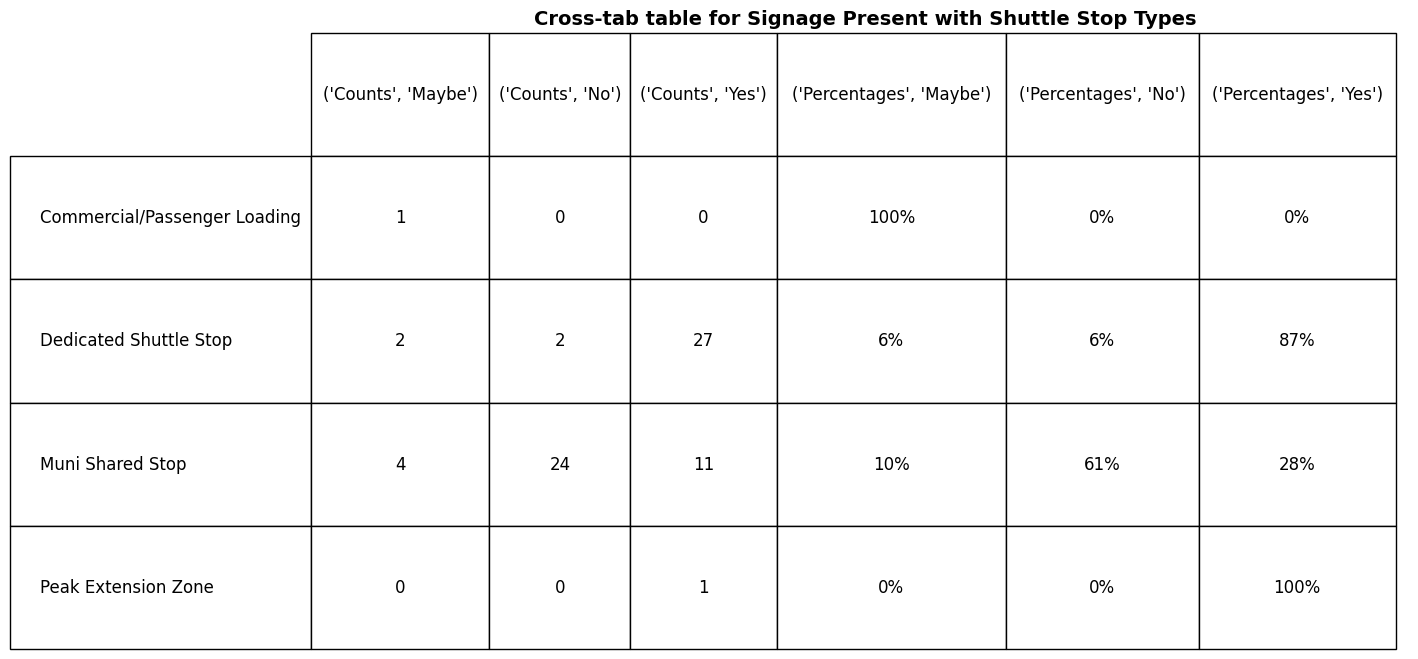

In [38]:
# Plotting the table using matplotlib
fig, ax = plt.subplots(figsize=(14, 8))  # Set the figure size
ax.axis('off')  # Hide the axis

# Create a table from the DataFrame
table = ax.table(cellText=combined_df.values,
                 colLabels=combined_df.columns,
                 rowLabels=combined_df.index,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

plt.title("Cross-tab table for Signage Present with Shuttle Stop Types", fontsize=14, fontweight='bold')  # Title for the entire table figure

# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(12)

# Automatically adjust column width
table.auto_set_column_width([i for i in range(len(combined_df.columns))])

# Display the table
plt.show()